In [10]:
import pandas as pd
dataset=pd.read_csv('sentimentdataset.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [35]:
!pip install tensorflow
!pip install keras

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.0202 - loss: 6.0435 - val_accuracy: 0.0684 - val_loss: 5.8658 - learning_rate: 0.0010
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.0339 - loss: 5.7640 - val_accuracy: 0.0000e+00 - val_loss: 5.6227 - learning_rate: 0.0010
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.0324 - loss: 5.5925 - val_accuracy: 0.0000e+00 - val_loss: 5.5261 - learning_rate: 0.0010
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.0716 - loss: 5.2767 - val_accuracy: 0.0000e+00 - val_loss: 5.4713 - learning_rate: 0.0010
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.0657 - loss: 5.2289 - val_accuracy: 0.0684 - val_loss: 5.4125 - learning_rate: 0.0010
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.0578 - loss: 5.0616 - val_accuracy: 0.0598 - val_loss: 5.3844 - learning_rate: 0.0010
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.0832 - loss

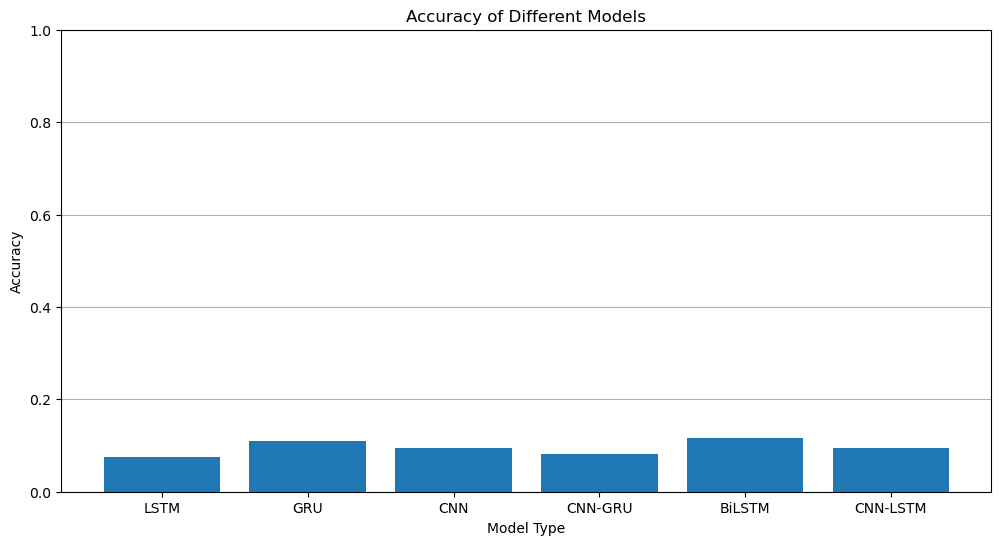

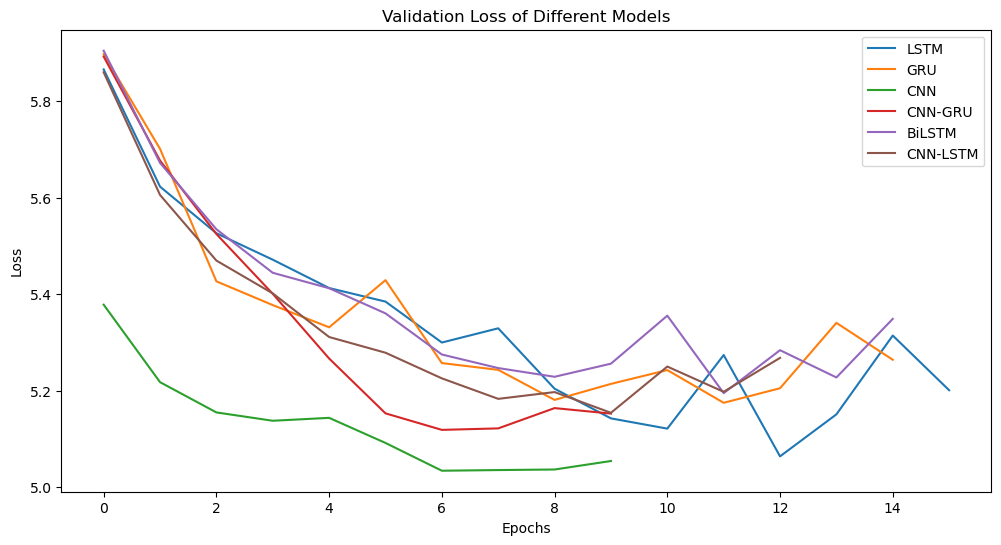

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Conv1D, MaxPooling1D, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import warnings

warnings.filterwarnings('ignore')

# 1. Tải và chuẩn bị dữ liệu
data = pd.read_csv('Sentiment Dataset.csv')  # Thay thế bằng đường dẫn đến tập dữ liệu của bạn

# 2. Tiền xử lý dữ liệu
def preprocess_text(text):
    text = text.lower()  # Chuyển về chữ thường
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Loại bỏ liên kết
    text = re.sub(r'\@\w+|\#', '', text)  # Loại bỏ hashtag và mention
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Loại bỏ ký tự đặc biệt
    return text

data['Text'] = data['Text'].apply(preprocess_text)

# Mã hóa nhãn
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Sentiment'])

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(data['Text'], y_encoded, test_size=0.2, random_state=42)

# Tokenization
max_words = 10000  # Số lượng từ tối đa
max_len = 150  # Độ dài tối đa của chuỗi
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# 3. Xây dựng mô hình
def build_model(model_type):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

    if model_type == 'BiLSTM':
        model.add(Bidirectional(LSTM(128, return_sequences=False)))  # Giữ nguyên return_sequences=False
        model.add(Dropout(0.5))
    elif model_type == 'LSTM':
        model.add(LSTM(128, return_sequences=False))  # Giữ nguyên return_sequences=False
        model.add(Dropout(0.5))
    elif model_type == 'GRU':
        model.add(GRU(128, return_sequences=False))  # Giữ nguyên return_sequences=False
        model.add(Dropout(0.5))
    elif model_type == 'CNN':
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())  # Chuyển đổi thành đầu ra 2D
    elif model_type == 'CNN-GRU':
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(GRU(128, return_sequences=False))  # Đảm bảo return_sequences=False
    elif model_type == 'CNN-LSTM':
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(LSTM(128, return_sequences=False))  # Đảm bảo return_sequences=False

    model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Đầu ra cho từng lớp

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# 4. Huấn luyện và đánh giá mô hình
model_types = ['LSTM', 'GRU', 'CNN', 'CNN-GRU', 'BiLSTM', 'CNN-LSTM']
histories = {}
accuracies = {}

for model_type in model_types:
    model = build_model(model_type)
    
    # Thiết lập callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    model_checkpoint = ModelCheckpoint(f'{model_type}_best_model.keras', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

    # Huấn luyện mô hình
    history = model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_split=0.2, 
                        callbacks=[early_stopping, model_checkpoint, reduce_lr])
    
    scores = model.evaluate(X_test_pad, y_test, verbose=0)
    
    histories[model_type] = history
    accuracies[model_type] = scores[1]  # Lưu accuracy

# 5. Vẽ biểu đồ so sánh hiệu suất của các mô hình
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Accuracy of Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model Type')
plt.ylim(0, 1)  # Thiết lập giới hạn y từ 0 đến 1
plt.grid(axis='y')
plt.show()

# 6. Vẽ biểu đồ loss
plt.figure(figsize=(12, 6))
for model_type, history in histories.items():
    plt.plot(history.history['val_loss'], label=model_type)

plt.title('Validation Loss of Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
